<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Balance-for-different-number-of-nodes" data-toc-modified-id="Balance-for-different-number-of-nodes-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Balance for different number of nodes</a></span></li></ul></div>

In [21]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from result_analysis import plot_ri, print_final_flows, plot_cost_all_path, plot_ri_list, plot_balance_list

import pandas as pd

from result_analysis import plot_stop_and_cost

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Balance for different number of nodes

In [31]:
import matplotlib

In [40]:
font = {'size'   : 15, 'weight': 'normal'}

matplotlib.rc('font', **font)

10  nodes
output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False.pkl
25  nodes
output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False.pkl
100  nodes
output_L_10000_ni_1000_no_20_ev_0_relative_progress_fu_False.pkl


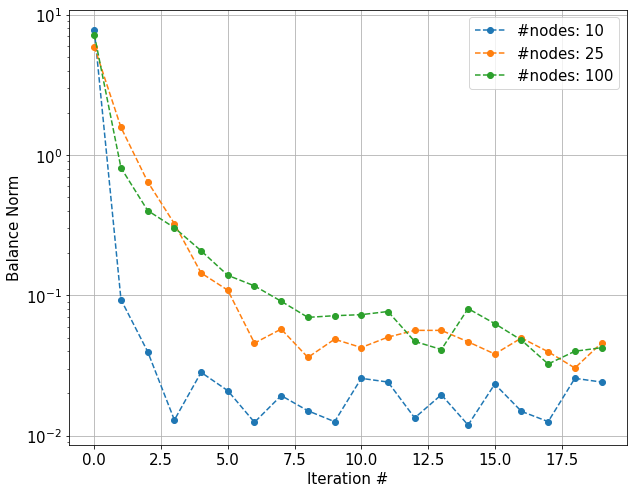

In [42]:
n_nodes_list=[10, 25, 100]

plt.figure(figsize=(10,8))
for n in n_nodes_list:
    print(n, ' nodes')
    path='Data/'+str(n)+'Nodes/outputs/quals/results_withBumps'
    filename=os.listdir(path)[0]
    print(filename)

    with open(os.path.join(path, filename), 'rb') as f:
            G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list, balance_list = pickle.load(f)
    b=[]
    for b_ in balance_list:
        b.append(b_[-1])
    plt.plot(np.array(b), 'o--', label='#nodes: ' + str(n))
    plt.grid(True)
    plt.legend()
    plt.yscale('log')
    plt.xlabel('Iteration #')
    plt.ylabel('Balance Norm')
    plt.savefig('Data/ImagesQuals/balance_n_Nodes.png',transparent=True, dpi=400)

-----

Deux choses que je ne comprends vraiment pas avec le 10 nodes: 
- pourquoi y a t il autant d oscillations en ri
- pourquoi les balances sont si hautes

On sait tres bien que ces deux aspects sont directement lies hein! Puisque les oscillations sont directement liees a balance. 

Les oscillations ne se calment absolument pas quand tu augmentes le nombre de noeuds dans ton graphe. But if you do not correct the size of oscillations, never will you actually solve the problem. 

And how is it that with a worse solved problem you have fewer oscillations? 